In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Show all unique values of the 'Geography' column
pays_uniques = data['Geography'].unique()
print(pays_uniques)

['France' 'Spain' 'Germany']


In [7]:
#Removal of unnecessary columns for prediction
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Encoding the Geography and Gender category columns with one-ho
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [10]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
#conversion of boolean columns to integer
data['Geography_Germany'] = data['Geography_Germany'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)
data['Gender_Male'] = data['Gender_Male'].astype(int)

In [12]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [14]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [15]:
#standardization of continuous variables
from sklearn.preprocessing import StandardScaler

# Selection of columns to standardize
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Initialization of the StandardScaler
scaler = StandardScaler()

# Application of the scaler only on continuous columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [16]:
data[columns_to_scale].head()

,CreditScore,Age,Balance,EstimatedSalary
0,-0.326221,0.293517,-1.225848,0.021886
1,-0.440036,0.198164,0.117350,0.216534
2,-1.536794,0.293517,1.333053,0.240687
3,0.501521,0.007457,-1.225848,-0.108918
4,2.063884,0.388871,0.785728,-0.365276


In [17]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,1,0


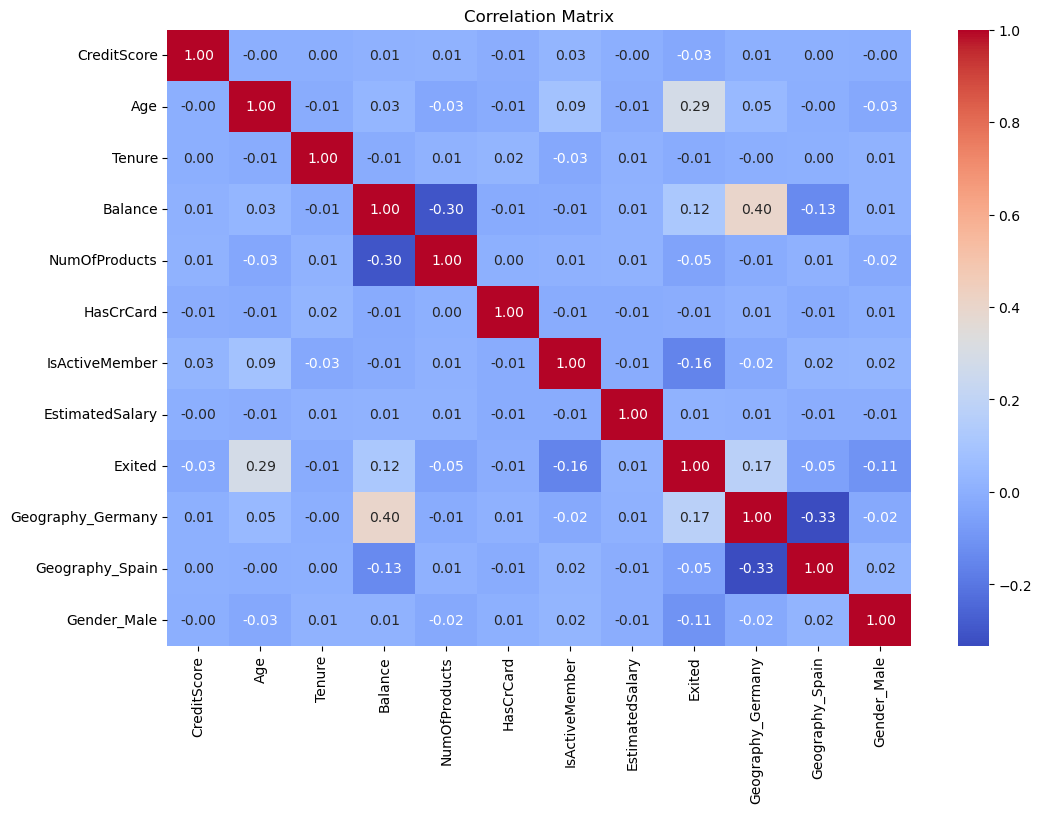

In [18]:
# Calculation of the correlation matrix
correlation_matrix = data.corr()

# Displaying the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

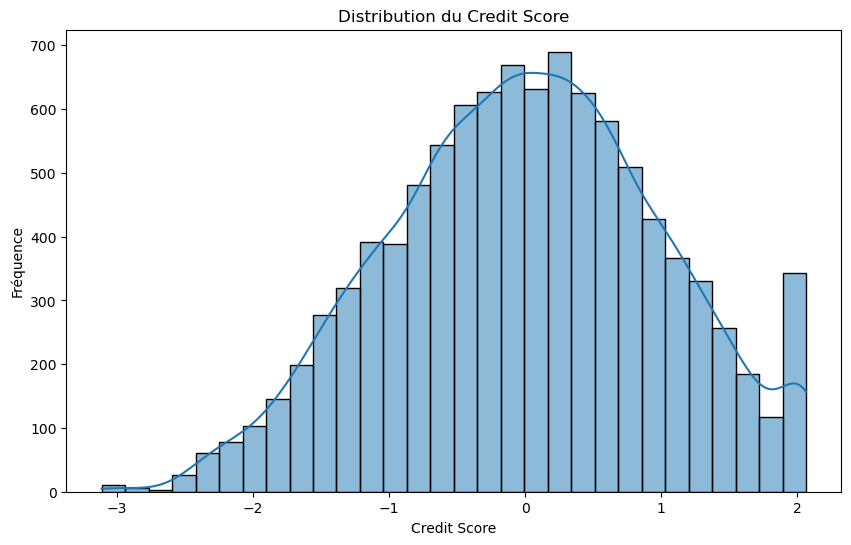

In [19]:
#Distribution variable Creditscore
plt.figure(figsize=(10, 6))
sns.histplot(data['CreditScore'], bins=30, kde=True)
plt.title('Distribution du Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Fréquence')
plt.show()

In [20]:
#Separation of characteristic (X) and target (y)
X = data.drop('Exited', axis=1)  
y = data['Exited']

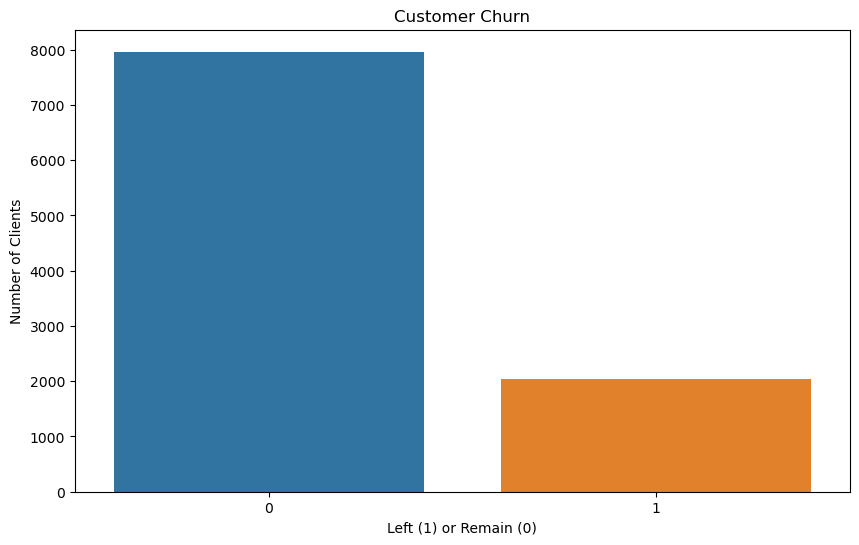

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Exited', data=data)
plt.title('Customer Churn')
plt.xlabel('Left (1) or Remain (0)')
plt.ylabel('Number of Clients')
plt.show()

In [34]:
#Model The Data
data= pd.read_csv("Churn_Modelling.csv")

In [36]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
data.drop(['RowNumber'], axis=1, inplace= True)

In [38]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [39]:
data= data.join(pd.get_dummies(data['Geography'], prefix= 'Geo').astype('int'))

In [40]:
data.drop(['Geography'], axis=1, inplace= True)

In [41]:
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [42]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [43]:
data['Gender']= data['Gender'].astype('str').apply(lambda x: 1 if x=='Female' else 0)

In [44]:
data['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [45]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geo_France', 'Geo_Germany', 'Geo_Spain'],
      dtype='object')

In [46]:
data= data[['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Exited']]
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
0,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Gender           10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Geo_France       10000 non-null  int32  
 12  Geo_Germany      10000 non-null  int32  
 13  Geo_Spain        10000 non-null  int32  
 14  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9), object(1)
memory usage: 1.0+ MB


In [48]:
data.duplicated().sum()

0

In [49]:
data[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Exited']].corr().style.background_gradient(cmap='coolwarm')

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,-0.027094
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,-0.006772,0.024628,-0.016889,0.106512
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,0.285323
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,-0.014001
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,0.118533
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,-0.047820
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,-0.007138
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,-0.156128
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,0.012097
Geo_France,-0.008928,-0.006772,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,1.000000,-0.580359,-0.575418,-0.104955


In [50]:
X= data[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain']]
y= data['Exited']

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
sc= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test, y_pred)
acc

0.811

In [56]:
from sklearn.metrics import confusion_matrix
cm= pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1
0,1528,56
1,322,94


# DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion= 'gini')
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test, y_pred)
acc

0.7895

In [59]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm= pd.DataFrame(cm)
cm

,0,1
0,1348,236
1,185,231


# RANDOM FOREST CLASSIFIER

In [61]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100, criterion='gini')
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.868

In [63]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm= pd.DataFrame(cm)
cm

,0,1
0,1527,57
1,207,209


In [ ]:
#MODEL RANKING BASED ON ACCURACY SCORE

#Random Forest Classifier- 86%
#Logistic Regression- 81%
#Decision Tree Classifier- 79%